In [172]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import mplleaflet

In [173]:
# let's join multiple files into one dataframe
path =r'C:\Users\Kostiantyn_Kudriavts\notebooks\dwnld\10-01' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df_ = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df_)
full_df = pd.concat(list_)

In [174]:
# extract columns subst
df = full_df[['PROPERTY TYPE', 'CITY', 'STATE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'YEAR BUILT', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'HOA/MONTH', 'LATITUDE', 'LONGITUDE']].copy()
df.head()

,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE
0,Townhouse,Lynnwood,WA,98036,499000.0,3.0,2.5,2015.0,Lynnwood,1781.0,2145.0,180.0,47.819235,-122.268907
1,Single Family Residential,Lynnwood,WA,98036,535000.0,4.0,2.5,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847
2,Single Family Residential,Lynnwood,WA,98036,549950.0,3.0,2.5,2012.0,Martha Lake,2056.0,4066.0,50.0,47.827543,-122.258007
3,Single Family Residential,Lynnwood,WA,98036,325000.0,3.0,2.0,1981.0,Alderwood Manor,1248.0,10454.0,NaN,47.816284,-122.276086
4,Single Family Residential,Lynnwood,WA,98036,500000.0,4.0,2.5,1965.0,Alderwood Manor,2706.0,8276.0,NaN,47.818136,-122.279972


In [175]:
# filter out properties outside of WA
df = df[df['STATE'] == 'WA']

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 176
Data columns (total 14 columns):
PROPERTY TYPE    2917 non-null object
CITY             2917 non-null object
STATE            2917 non-null object
ZIP              2917 non-null object
PRICE            2916 non-null float64
BEDS             2917 non-null float64
BATHS            2680 non-null float64
YEAR BUILT       2570 non-null float64
LOCATION         2917 non-null object
SQUARE FEET      2689 non-null float64
LOT SIZE         2557 non-null float64
HOA/MONTH        1125 non-null float64
LATITUDE         2917 non-null float64
LONGITUDE        2917 non-null float64
dtypes: float64(9), object(5)
memory usage: 341.8+ KB


In [177]:
df.describe()

,PRICE,BEDS,BATHS,YEAR BUILT,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE
count,2.916000e+03,2917.000000,2680.000000,2570.000000,2689.000000,2.557000e+03,1125.000000,2917.000000,2917.000000
mean,8.935831e+05,3.180665,2.459608,1986.946304,2396.173671,6.528017e+04,237.400889,47.722352,-122.167205
std,9.849445e+05,1.530866,1.013798,25.453234,1331.722692,2.259670e+05,270.417659,0.123896,0.169631
min,1.900000e+04,0.000000,0.750000,1900.000000,1.000000,1.000000e+00,2.000000,47.343174,-122.418293
25%,4.999500e+05,2.000000,1.750000,1970.250000,1454.000000,6.100000e+03,48.000000,47.627864,-122.289309
50%,6.999500e+05,3.000000,2.500000,1990.000000,2211.000000,9.603000e+03,125.000000,47.738500,-122.194385
75%,9.600000e+05,4.000000,3.000000,2007.000000,3080.000000,3.306900e+04,365.000000,47.810312,-122.118649
max,3.200000e+07,24.000000,24.000000,2020.000000,16430.000000,7.044959e+06,3187.000000,48.047245,-121.236754


In [178]:
# median price $893.583, 3 beds, 2 baths, built in 1986, sq 2396 = 222.5 sq m, lot 65280=1.5 acr

In [179]:
# 0.8 percentile
df.quantile(.8)

PRICE          1.099995e+06
BEDS           4.000000e+00
BATHS          3.000000e+00
YEAR BUILT     2.012200e+03
SQUARE FEET    3.229000e+03
LOT SIZE       4.704500e+04
HOA/MONTH      4.050000e+02
LATITUDE       4.782633e+01
LONGITUDE     -1.220828e+02
Name: 0.8, dtype: float64

In [180]:
# clean data and remove size less than 100
df.drop(df[df['SQUARE FEET'] <= 100].index, inplace=True)
# ignore properties more expensive then 1.25M
df.drop(df[df.PRICE > 1250000].index, inplace=True)

In [181]:
len(df)


662

In [182]:
len(df[df.BATHS < 2])

188

In [183]:
len(df[df.BATHS >= 2])

416

In [184]:
df = df[(df.BATHS >= 2) & (df.BEDS < 5)]
len(df)


346

In [185]:
# enrich data
# add price per sq ft
df['price_per_sqft'] = df['PRICE']/df['SQUARE FEET']

# add lot price
df['price_per_sqft_lot'] = df['PRICE']/df['LOT SIZE']

# change price scale from USD to thoushand USD
df["PRICE"] = df["PRICE"]/1000

# geolocation embeddeding 
df["LL"] = df['LATITUDE']*df['LONGITUDE']

df.head()


,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL
1,Single Family Residential,Lynnwood,WA,98036,535.00,4.0,2.50,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847,281.875659,87.733683,-5845.832502
3,Single Family Residential,Lynnwood,WA,98036,325.00,3.0,2.00,1981.0,Alderwood Manor,1248.0,10454.0,NaN,47.816284,-122.276086,260.416667,31.088579,-5846.788050
13,Single Family Residential,Lynnwood,WA,98036,499.95,3.0,2.25,1977.0,Alderwood Manor,1654.0,22651.0,NaN,47.826620,-122.258257,302.267231,22.071873,-5847.199214
28,Single Family Residential,Bellevue,WA,98006,1187.00,4.0,3.25,2004.0,Lakemont,3330.0,5616.0,50.0,47.566269,-122.123382,356.456456,211.360399,-5808.953595
35,Single Family Residential,Bellevue,WA,98006,1168.00,4.0,2.25,1961.0,Newport Hills,2590.0,16452.0,NaN,47.554627,-122.170031,450.965251,70.994408,-5809.750250


In [186]:
df.describe()

,PRICE,BEDS,BATHS,YEAR BUILT,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL
count,346.000000,346.000000,346.000000,327.000000,346.000000,303.000000,153.000000,346.000000,346.000000,346.000000,303.000000,346.000000
mean,733.682223,3.364162,2.544075,1991.840979,2323.138728,36536.115512,173.189542,47.746883,-122.164210,335.180767,8883.926946,-5832.961826
std,227.179383,0.710410,0.425681,22.167498,830.196969,86550.006612,199.377378,0.125878,0.136876,115.287317,87978.763921,17.255837
min,145.999000,1.000000,2.000000,1914.000000,857.000000,1.000000,3.000000,47.480985,-122.409281,84.053780,0.591155,-5860.326430
25%,575.712500,3.000000,2.250000,1977.000000,1711.000000,5000.000000,42.000000,47.674895,-122.229641,266.664486,33.303989,-5845.917662
50%,719.000000,3.000000,2.500000,1996.000000,2231.500000,8292.000000,88.000000,47.766234,-122.184911,307.109102,85.853535,-5836.470134
75%,885.410000,4.000000,2.750000,2008.500000,2858.000000,23522.500000,261.000000,47.831449,-122.114609,378.083916,156.873848,-5824.411967
max,1250.000000,4.000000,4.250000,2018.000000,7891.000000,877942.000000,1050.000000,48.046956,-121.739704,878.571429,941990.000000,-5781.777871


In [187]:
!pip install sklearn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.4 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [188]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(df['PRICE'].values.reshape(-1, 1) )
kmeans.cluster_centers_


array([[ 841.27641414],
       [ 420.78420312],
       [1096.55578947],
       [ 643.91916667]])

In [189]:
import numpy as np

def predict(price):
    return kmeans.predict(np.atleast_1d(price).reshape(1, -1))[0]

df['CLUSTER'] = df.PRICE.apply( predict )


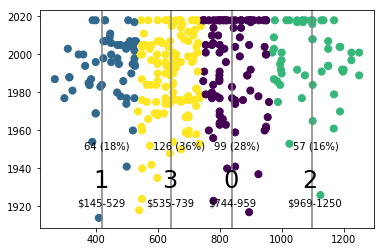

In [211]:
# collors show price cluster,Y-axis doesn't influence cluster selection 
plt.scatter(df['PRICE'], df['YEAR BUILT'], c=df['CLUSTER'], s=50, cmap='viridis')

centers = kmeans.cluster_centers_
total = len(df)
i = 0
for xc in centers:
    plt.axvline(x=xc, color='grey')
    cdf = df[df['CLUSTER'] == i]
    plt.text(xc-60, 1950, str( len(cdf) ) + ' (' + str(int(len(cdf)/total*100)) +'%)')
    plt.text(xc-80, 1920, '$' + str(int(cdf['PRICE'].min())) + '-' + str(int(cdf['PRICE'].max())) )
    plt.text(xc-30, 1930, str(i),  {'color': 'k', 'fontsize': 24})
    i = i + 1
    

In [191]:
import folium
print(folium.__file__)
print(folium.__version__)

C:\Users\Kostiantyn_Kudriavts\AppData\Local\Continuum\anaconda3\envs\spark\lib\site-packages\folium\__init__.py
0.6.0


In [192]:
import folium
# create empty map zoomed in on San Francisco
map_osm = folium.Map(location = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start = 10, tiles="CartoDB dark_matter")

def color_producer(cluster):
    if cluster == 0:
        return 'blue'
    elif cluster == 1:
        return 'yellow'
    elif cluster == 2:
        return 'magenta'
    else:
        return 'green'

MAX_RECORDS = len(df)
# add a marker for every record in the filtered data, use a clustered view
for each in df[0:MAX_RECORDS].iterrows():
    price = each[1]['PRICE']
    cluster = each[1]['CLUSTER']
    folium.Circle([each[1]['LATITUDE'], each[1]['LONGITUDE']], radius=1, color=color_producer(cluster), popup='$'+str(price)+' grans' ).add_to(map_osm)
  
display(map_osm)

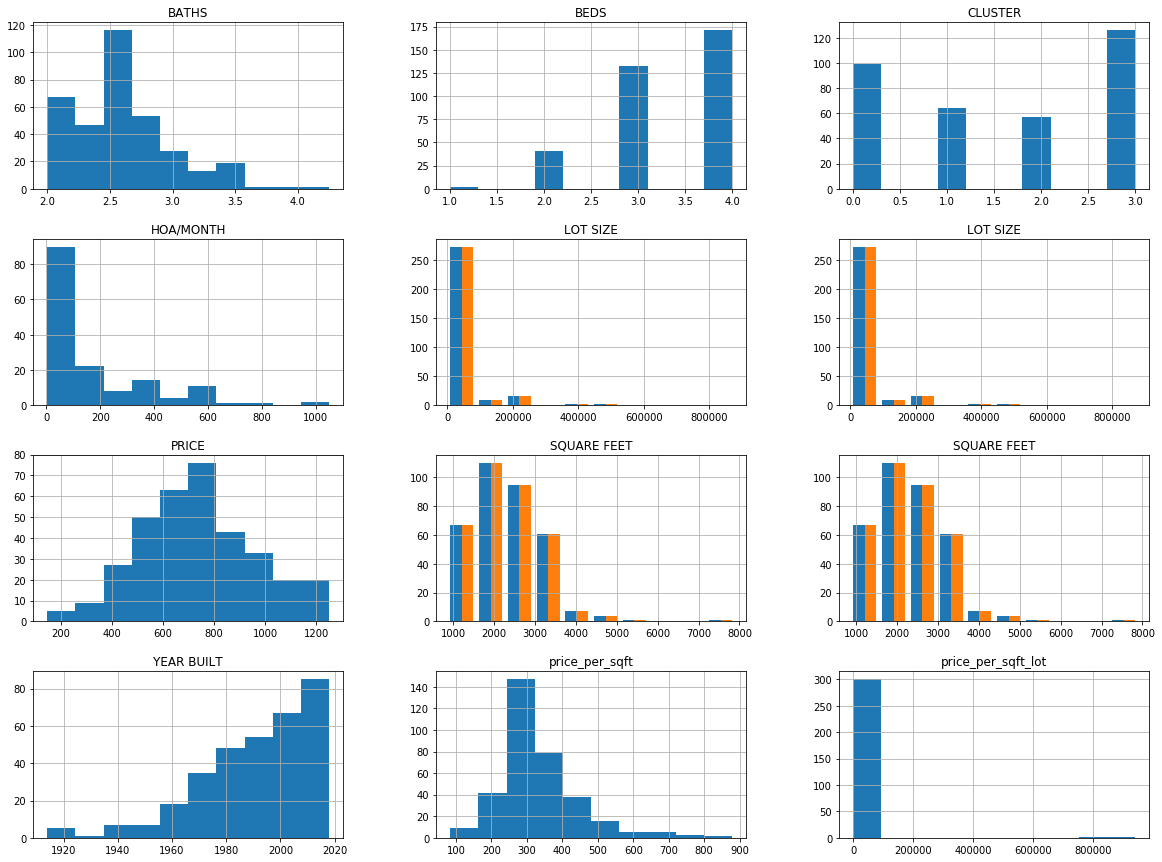

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(column=["PRICE", "BEDS", "BATHS", "SQUARE FEET", "LOT SIZE", 'YEAR BUILT', 'SQUARE FEET', 'LOT SIZE', 
                'HOA/MONTH', 'price_per_sqft', 'price_per_sqft_lot', 'CLUSTER'],
          figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [194]:
# let’s look at how much each independent variable correlates with this dependent variable (which is price)
corr_matrix = df.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                 1.000000
SQUARE FEET           0.564087
price_per_sqft        0.364705
BATHS                 0.356215
BEDS                  0.344683
LL                    0.141738
YEAR BUILT            0.099260
price_per_sqft_lot    0.070377
LONGITUDE            -0.055538
LOT SIZE             -0.081280
CLUSTER              -0.129274
HOA/MONTH            -0.153197
LATITUDE             -0.182599
Name: PRICE, dtype: float64

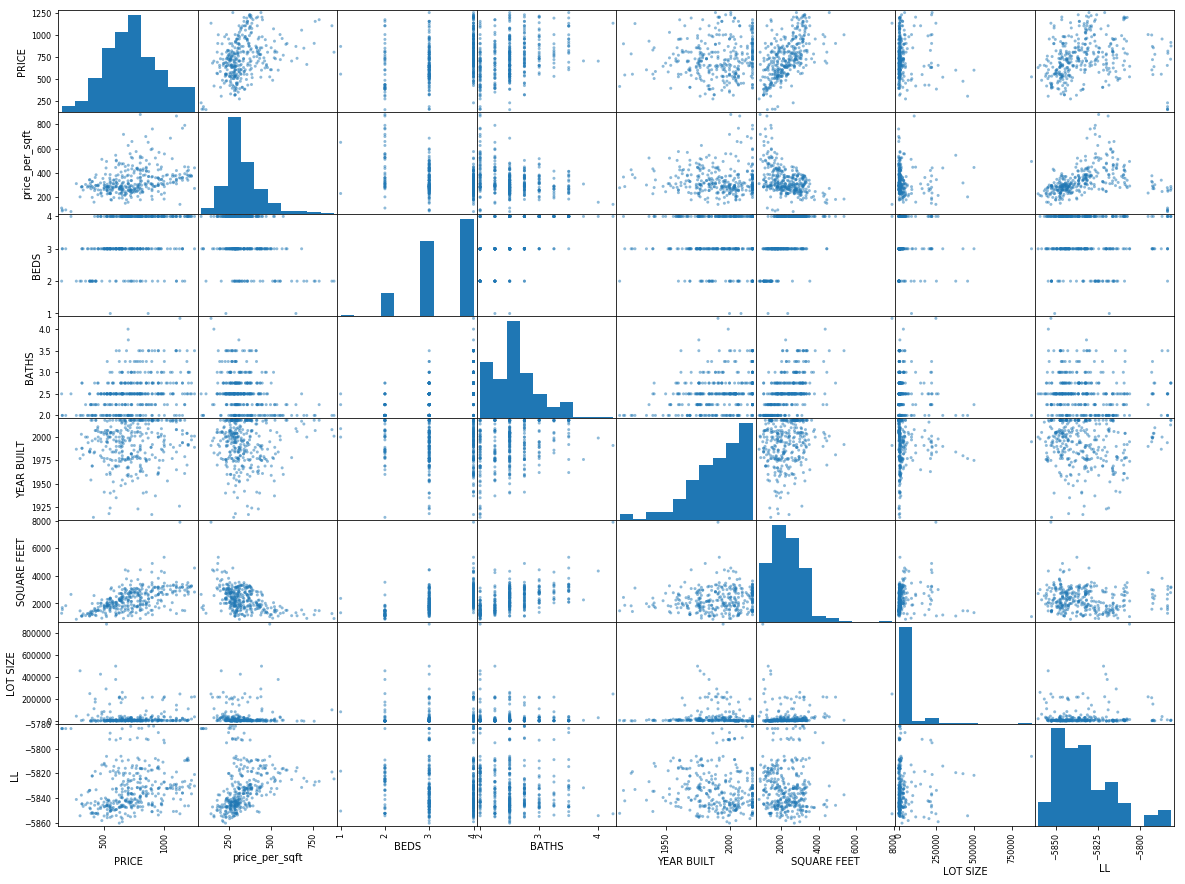

In [277]:
from pandas.plotting import scatter_matrix
attributes = ["PRICE", "price_per_sqft", "BEDS", "BATHS", 'YEAR BUILT', 'SQUARE FEET', 'LOT SIZE', 'LL']
scatter_matrix(df[attributes], figsize=(20, 15))
plt.savefig('matrix.png')

In [278]:
from sklearn.cluster import AgglomerativeClustering

geo_coord = df[['LATITUDE','LONGITUDE']]
clustering = AgglomerativeClustering(n_clusters=10, affinity='l2', linkage='average').fit(geo_coord)

label_name = clustering.labels_.astype(np.int)


In [279]:
from pandas import Series

df['GEO_CLUSTER'] = Series(clustering.labels_, index=df.index)
df.head()

,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,YEAR BUILT,LOCATION,SQUARE FEET,LOT SIZE,HOA/MONTH,LATITUDE,LONGITUDE,price_per_sqft,price_per_sqft_lot,LL,CLUSTER,GEO_CLUSTER
1,Single Family Residential,Lynnwood,WA,98036,535.00,4.0,2.50,2000.0,Brier,1898.0,6098.0,NaN,47.812864,-122.264847,281.875659,87.733683,-5845.832502,3,4
3,Single Family Residential,Lynnwood,WA,98036,325.00,3.0,2.00,1981.0,Alderwood Manor,1248.0,10454.0,NaN,47.816284,-122.276086,260.416667,31.088579,-5846.788050,1,4
13,Single Family Residential,Lynnwood,WA,98036,499.95,3.0,2.25,1977.0,Alderwood Manor,1654.0,22651.0,NaN,47.826620,-122.258257,302.267231,22.071873,-5847.199214,1,4
28,Single Family Residential,Bellevue,WA,98006,1187.00,4.0,3.25,2004.0,Lakemont,3330.0,5616.0,50.0,47.566269,-122.123382,356.456456,211.360399,-5808.953595,2,9
35,Single Family Residential,Bellevue,WA,98006,1168.00,4.0,2.25,1961.0,Newport Hills,2590.0,16452.0,NaN,47.554627,-122.170031,450.965251,70.994408,-5809.750250,2,9


In [296]:
aggregation = {
    'PRICE' : {
        'mean_price': 'mean',
        'median_price': 'median'
    },
    'price_per_sqft' : {
        'mean_price_sqft': 'mean',
        'median_price_sqft': 'median'
    }
}
df.groupby('GEO_CLUSTER').agg(aggregation)

C:\Users\Kostiantyn_Kudriavts\AppData\Local\Continuum\anaconda3\envs\spark\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



PRICE               price_per_sqft                  
             mean_price median_price mean_price_sqft median_price_sqft
GEO_CLUSTER                                                           
0            874.383414     839.9500      316.586853        310.734463
1            655.758333     639.9500      231.694151        234.542986
2            694.143486     639.0000      312.843686        310.752688
3            639.857500     717.5000      244.300668        271.593985
4            636.015103     624.9000      277.355688        282.283142
5            644.096125     629.4750      381.837371        361.812342
6            831.291111     799.9500      401.841360        377.877907
7            812.153000     799.9950      535.027415        498.711554
8            512.599875     514.9495      221.276557        219.183950
9            866.562655     839.5000      424.917471        425.510314

In [280]:
import math
# create empty map zoomed in on San Francisco
map_osm = folium.Map(location = [df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start = 9, tiles="CartoDB dark_matter")

colors = ['blue', 'aqua', 'green', 'Lime', 'yellow', 'DarkOrange', 'DarkSalmon', 'red', 'purple', 'Fuchsia', 'chocolate']
def get_color(cluster):
    if math.isnan(cluster):
        return "white"
    else:
        return colors[int(cluster)]

MAX_RECORDS = len(df)
# add a marker for every record in the filtered data, use a clustered view
for each in df[0:MAX_RECORDS].iterrows():
    price = each[1]['PRICE']
    cluster = each[1]['GEO_CLUSTER']
    folium.Circle([each[1]['LATITUDE'], each[1]['LONGITUDE']], radius=1, color=get_color(cluster), popup='$'+str(price)+' grans, cluster='+str(cluster) ).add_to(map_osm)
  
display(map_osm)

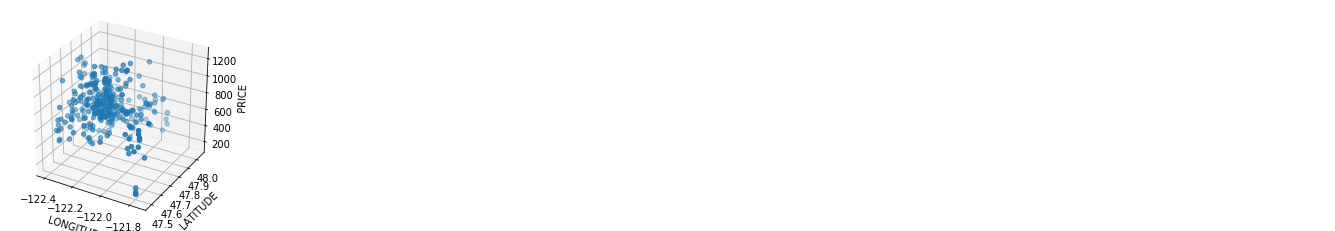

In [292]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure(figsize=(4, 4)).gca(projection='3d')
threedee.scatter(df['LONGITUDE'], df['LATITUDE'], df['PRICE'])
threedee.set_xlabel('LONGITUDE')
threedee.set_ylabel('LATITUDE')
threedee.set_zlabel('PRICE')
plt.show()

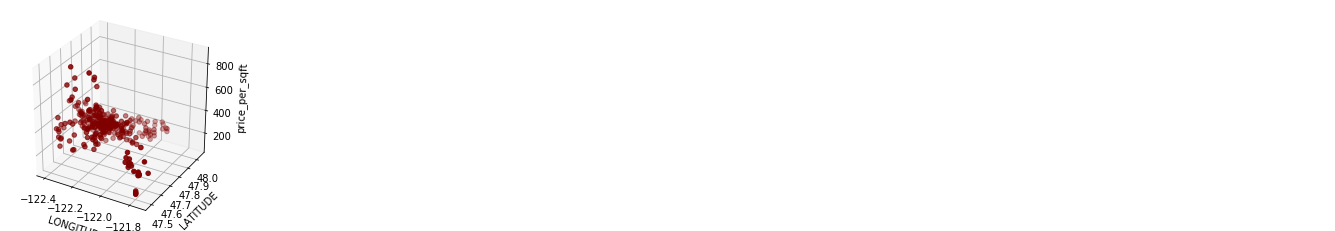

In [294]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure(figsize=(4, 4)).gca(projection='3d')
threedee.scatter(df['LONGITUDE'], df['LATITUDE'], df['price_per_sqft'], c='maroon')
threedee.set_xlabel('LONGITUDE')
threedee.set_ylabel('LATITUDE')
threedee.set_zlabel('price_per_sqft')
plt.show()